In [58]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from numpy import std
from numpy import mean
from sklearn.ensemble import RandomForestClassifier
import plotly.offline as py
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
df = pd.read_csv('employee_details.csv')
df.head()
df["OverTime"]= df["OverTime"].replace("Yes",1) 
df["OverTime"]= df["OverTime"].replace("No",0) 
df

,Unique_employee id,Age,BusinessTravel,Department,technical_competency,Gender,JobLevel,JobRole,no_of companies,OverTime,PerformanceRating,Experience_years,YearsInCurrentRole,employee_count
0,1705159,41,Travel_Rarely,Sales,ML,Female,2,Sales Executive,8,1,3,8,4,1
1,1705160,49,Travel_Frequently,Research & Development,ML,Male,2,Research Scientist,1,0,4,10,7,1
2,1705161,37,Travel_Rarely,Research & Development,UI,Male,1,Laboratory Technician,6,1,3,7,0,1
3,1705162,33,Travel_Frequently,Research & Development,ML,Female,1,Research Scientist,1,1,3,8,7,1
4,1705163,27,Travel_Rarely,Research & Development,java,Male,1,Laboratory Technician,9,0,3,6,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1705235,35,Travel_Rarely,Sales,Marketing,Male,2,Sales Executive,0,0,3,16,13,1
77,1705236,45,Travel_Rarely,Research & Development,UI,Male,3,Research Director,4,1,3,17,0,1
78,1705237,37,Travel_Rarely,Research & Development,java,Male,3,Research Director,4,0,3,16,2,1
79,1705238,46,Travel_Rarely,Human Resources,java,Male,2,Human Resources,8,1,4,16,2,1


In [60]:
df2=df.iloc[3:80,:-1]
x=df2.corr(method ='pearson') 
x

,Unique_employee id,Age,JobLevel,no_of companies,OverTime,PerformanceRating,Experience_years,YearsInCurrentRole
Unique_employee id,1.000000,0.192306,0.207718,0.101175,0.021005,0.069128,0.176318,0.054985
Age,0.192306,1.000000,0.483666,0.373700,0.117461,0.021341,0.692778,0.158422
JobLevel,0.207718,0.483666,1.000000,0.088648,-0.057866,-0.086394,0.813705,0.496548
no_of companies,0.101175,0.373700,0.088648,1.000000,0.239130,0.036944,0.326050,-0.130447
OverTime,0.021005,0.117461,-0.057866,0.239130,1.000000,0.040435,-0.033893,-0.224725
PerformanceRating,0.069128,0.021341,-0.086394,0.036944,0.040435,1.000000,-0.037311,0.069892
Experience_years,0.176318,0.692778,0.813705,0.326050,-0.033893,-0.037311,1.000000,0.457311
YearsInCurrentRole,0.054985,0.158422,0.496548,-0.130447,-0.224725,0.069892,0.457311,1.000000


In [61]:
df1=df.iloc[5:80,:-1]
y=df1.corr(method='pearson')
y

,Unique_employee id,Age,JobLevel,no_of companies,OverTime,PerformanceRating,Experience_years,YearsInCurrentRole
Unique_employee id,1.000000,0.166066,0.177922,0.163971,0.039195,0.048110,0.162757,0.065798
Age,0.166066,1.000000,0.475367,0.438474,0.117804,0.011047,0.690861,0.158471
JobLevel,0.177922,0.475367,1.000000,0.120980,-0.051389,-0.099346,0.813721,0.508076
no_of companies,0.163971,0.438474,0.120980,1.000000,0.295300,0.054936,0.365659,-0.114861
OverTime,0.039195,0.117804,-0.051389,0.295300,1.000000,0.046029,-0.034112,-0.248873
PerformanceRating,0.048110,0.011047,-0.099346,0.054936,0.046029,1.000000,-0.043790,0.072838
Experience_years,0.162757,0.690861,0.813721,0.365659,-0.034112,-0.043790,1.000000,0.461040
YearsInCurrentRole,0.065798,0.158471,0.508076,-0.114861,-0.248873,0.072838,0.461040,1.000000


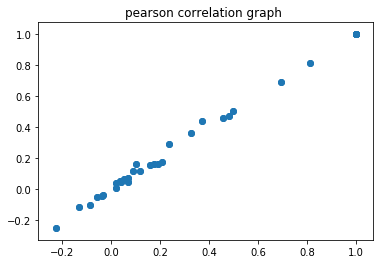

In [62]:
plt.scatter(x,y,cmap='Accent')
plt.title('pearson correlation graph ')
plt.show()


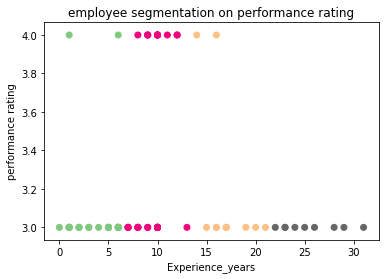

In [63]:
left_emp =  df[['Experience_years', 'PerformanceRating']]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 4, random_state = 0).fit(left_emp)
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['Experience_years'], left_emp['PerformanceRating'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Experience_years')
plt.ylabel('performance rating')
plt.title('employee segmentation on performance rating')
plt.show()

In [64]:
a = df[(df['technical_competency'] == 'ML')]
b= df[(df['technical_competency'] == 'UI')]
c=df[(df['technical_competency'] == 'java')]
d=df[(df['technical_competency'] == 'Marketing')]
e=df[(df['technical_competency'] == 'Web Dev')]

In [71]:
#------------COUNT-----------------------
x = [len(a), len(b),len(c),len(d),len(e)]
y = ['ML', 'UI','JAVA','Marketing','WebDev']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)

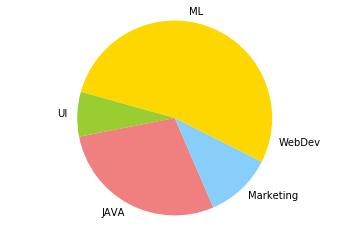

In [75]:
plt.pie(x,labels=y, colors=colors)

plt.axis('equal')
plt.show()

In [78]:
df['num_func']=df['JobLevel']*df['PerformanceRating']+df['OverTime']+df['YearsInCurrentRole']
df

,Unique_employee id,Age,BusinessTravel,Department,technical_competency,Gender,JobLevel,JobRole,no_of companies,OverTime,PerformanceRating,Experience_years,YearsInCurrentRole,employee_count,num_func
0,1705159,41,Travel_Rarely,Sales,ML,Female,2,Sales Executive,8,1,3,8,4,1,11
1,1705160,49,Travel_Frequently,Research & Development,ML,Male,2,Research Scientist,1,0,4,10,7,1,15
2,1705161,37,Travel_Rarely,Research & Development,UI,Male,1,Laboratory Technician,6,1,3,7,0,1,4
3,1705162,33,Travel_Frequently,Research & Development,ML,Female,1,Research Scientist,1,1,3,8,7,1,11
4,1705163,27,Travel_Rarely,Research & Development,java,Male,1,Laboratory Technician,9,0,3,6,2,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1705235,35,Travel_Rarely,Sales,Marketing,Male,2,Sales Executive,0,0,3,16,13,1,19
77,1705236,45,Travel_Rarely,Research & Development,UI,Male,3,Research Director,4,1,3,17,0,1,10
78,1705237,37,Travel_Rarely,Research & Development,java,Male,3,Research Director,4,0,3,16,2,1,11
79,1705238,46,Travel_Rarely,Human Resources,java,Male,2,Human Resources,8,1,4,16,2,1,11


In [112]:
a = df[(df['technical_competency'] == 'ML')]
b= df[(df['technical_competency'] == 'UI')]
c=df[(df['technical_competency'] == 'java')]
d=df[(df['technical_competency'] == 'Marketing')]
e=df[(df['technical_competency'] == 'Web Dev')]
a=a.iloc[:,[0,4,14]]
b=b.iloc[:,[0,4,14]]
c=c.iloc[:,[0,4,14]]
d=d.iloc[:,[0,4,14]]
e=e.iloc[:,[0,4,14]]
a

,Unique_employee id,technical_competency,num_func
0,1705159,ML,11
1,1705160,ML,15
3,1705162,ML,11
5,1705164,ML,10
7,1705166,ML,4
8,1705167,ML,19
14,1705173,ML,6
15,1705174,ML,18
16,1705175,ML,6
18,1705177,ML,20


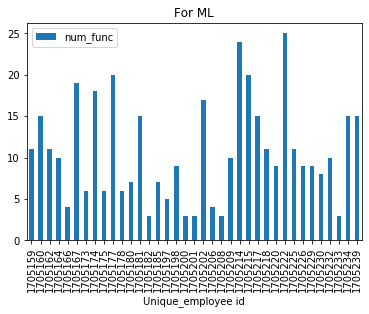

In [113]:
ax = a.plot.bar(x='Unique_employee id', y='num_func', rot=90,title='For ML')


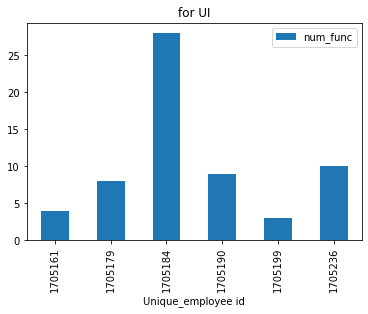

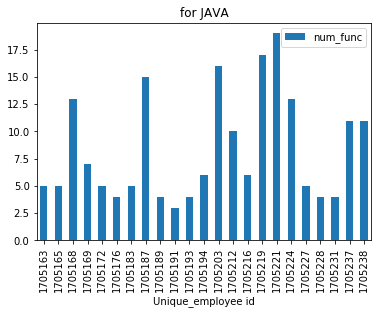

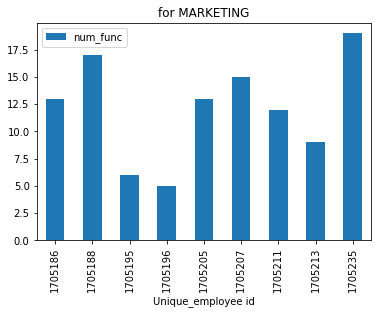

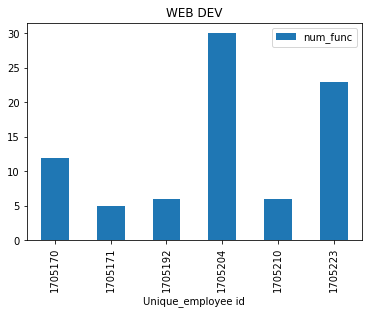

In [114]:
ax = b.plot.bar(x='Unique_employee id', y='num_func', rot=90,title='for UI')
ax = c.plot.bar(x='Unique_employee id', y='num_func', rot=90,title='for JAVA')
ax = d.plot.bar(x='Unique_employee id', y='num_func', rot=90,title='for MARKETING')
ax = e.plot.bar(x='Unique_employee id', y='num_func', rot=90,title='WEB DEV')